# Interaction analysis with miss-specified model

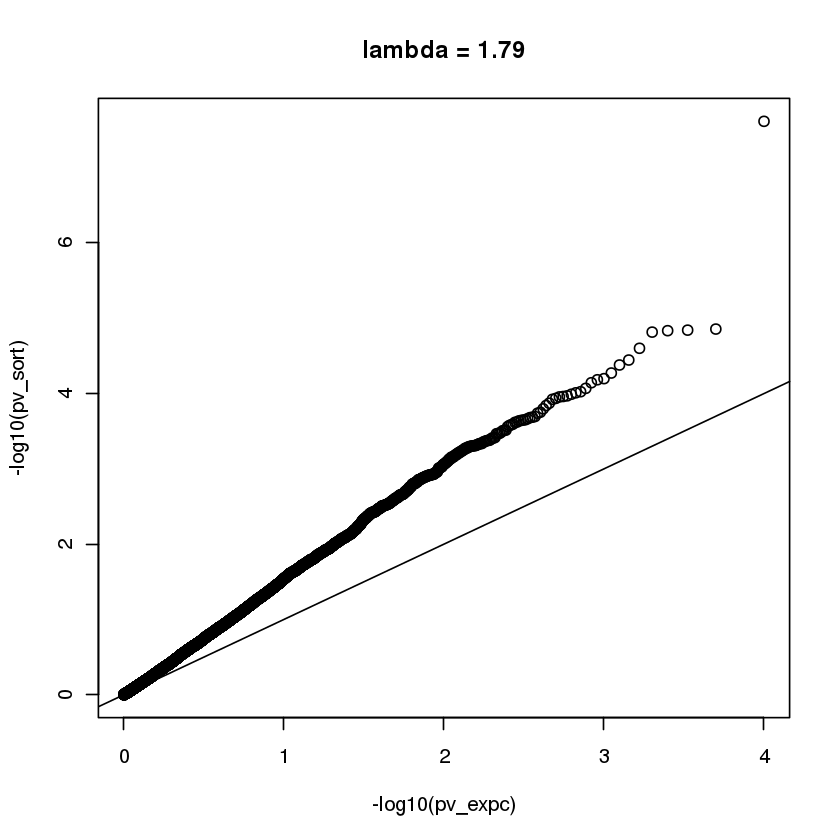

In [1]:
library(parallel)
n = 100 # number of tests
b0 = 30
b1 = 1
b2 = -1
b3 = -0.1
x1 = rnorm(n, 0.7, 9)
x2 = rnorm(n, 30, 10)
y = b0 + b1 * x1 + b2 * x2 + b3 * (x2-30)^2 + rnorm(n, 0, 12)
e = rbinom(n, 2, 0.3)
test.func = function(i){
  e_perm = sample(e, replace = F)
  m1= summary(lm(y ~ x1 + x2 * e_perm ))
  pv_intraction = m1$coefficients[5,4] # pvalue for interaction
  return (pv_intraction)  
}

N_test = 10000
test = mclapply(1:N_test, test.func, mc.cores = 2) # can use mc.cores > 1 if not windows.
pv_sort = sort(do.call(rbind, test))
pv_expc = (1:N_test)/N_test
plot(-log10(pv_expc), -log10(pv_sort))
abline(0, 1)
lambda = qchisq(1-median(pv_sort),1) / qchisq(1-median(0.5),1)
title(sprintf("lambda = %.2f", lambda))

# Robust estimator

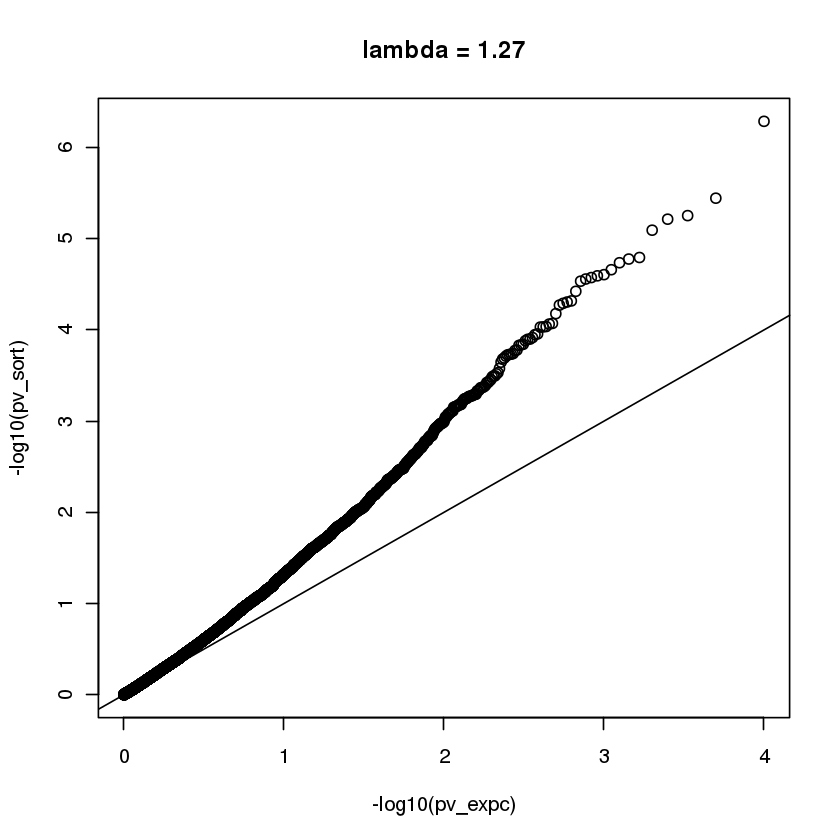

In [3]:
library(sandwich)
test2.func = function(i){
  e_perm = sample(e)
  m1= lm(y ~ x1 + x2 * e_perm)
  t_intraction = m1$coefficients[5]/sqrt(vcovHC(m1, type = "HC")[5,5])
  pv_interaction = 2 * pt(-abs(t_intraction), df = m1$df, lower.tail = T)
  return (pv_interaction)  
}
test = mclapply(1:N_test, test2.func) # can use mc.cores > 1 if not windows.
pv_sort = sort(do.call(rbind, test))
plot(-log10(pv_expc), -log10(pv_sort))
abline(0, 1)
lambda = qchisq(1-median(pv_sort),1) / qchisq(1-median(0.5),1)
title(sprintf("lambda = %.2f", lambda))

# With a better model

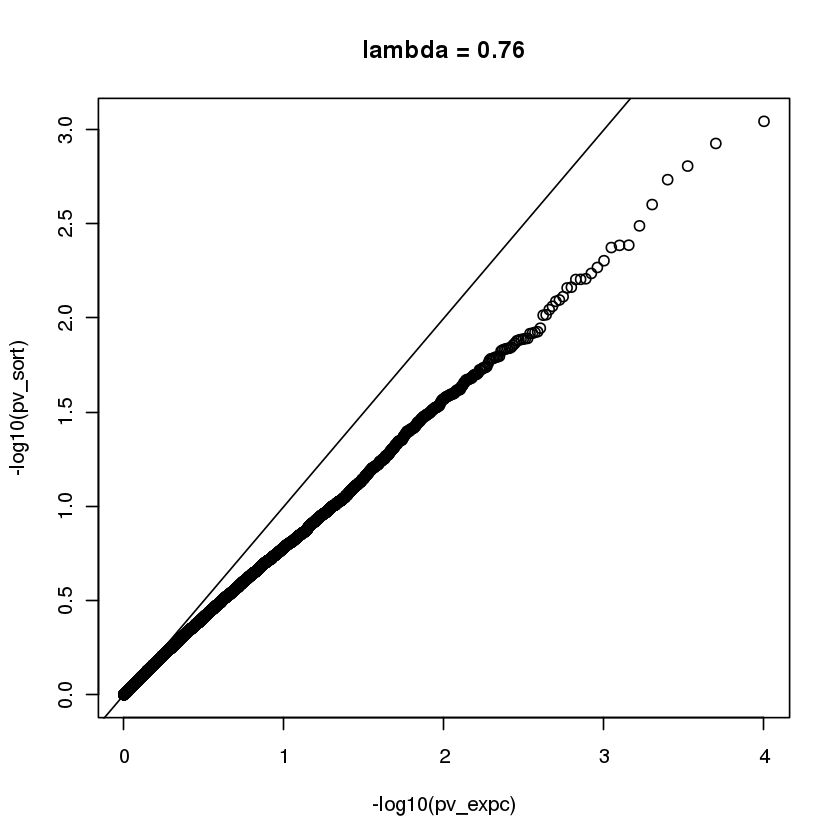

In [4]:
test3.func = function(i){
  e_perm = sample(e)
  m1= summary(lm(y ~ x1 + I(x2^2) + x2 * e_perm))
  pv_intraction = m1$coefficients[6,4] # pvalue for interaction
  return (pv_intraction)  
}
test = mclapply(1:N_test, test3.func) # can use mc.cores > 1 if not windows.
pv_sort = sort(do.call(rbind, test))
plot(-log10(pv_expc), -log10(pv_sort))
abline(0, 1)
lambda = qchisq(1-median(pv_sort),1) / qchisq(1-median(0.5),1)
title(sprintf("lambda = %.2f", lambda))

In [5]:
e_perm = sample(e)
  m1= summary(lm(y ~ x1 + I(x2^2) + x2 * e_perm))
  pv_intraction = m1$coefficients[6,4] # pvalue for interaction
m1$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-58.19376980,11.43598255,-5.088655,1.842262e-06
x1,1.12806767,0.12312354,9.162079,1.112156e-14
I(x2^2),-0.08587404,0.01026949,-8.362051,5.522875e-13
x2,4.43612765,0.68446314,6.481178,4.164585e-09
e_perm,11.30787238,6.37187443,1.774654,7.919238e-02
x2:e_perm,-0.41130046,0.19568299,-2.101871,3.823866e-02
